<a href="https://colab.research.google.com/github/mag381/cat/blob/main/MNIST%E4%BD%93%E9%A8%93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # CNNでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import utils as np_utils 
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# 入力と出力を指定 --- (*1)
im_rows = 28 # 画像の縦ピクセルサイズ
im_cols = 28 # 画像の横ピクセルサイズ
im_color = 1 # 画像の色空間/グレイスケール
in_shape = (im_rows, im_cols, im_color)
out_size = 10

In [3]:
# MNISTのデータを読み込み 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 読み込んだデータをの三次元配列に変換 --- (*1a)
X_train = X_train.reshape(-1, im_rows, im_cols, im_color)
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape(-1, im_rows, im_cols, im_color)
X_test = X_test.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y_train = np_utils.to_categorical(y_train.astype('int32'),10)
y_test = np_utils.to_categorical(y_test.astype('int32'),10)

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# CNNモデル構造を定義 --- (*2)
model = Sequential()
model.add(Conv2D(32, 
          kernel_size=(3, 3),
          activation='relu',
          input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))

In [5]:
# モデルをコンパイル --- (*3)
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

In [6]:
# 学習を実行 --- (*4)
hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
469/469 [==============================] - 20s 18ms/step - loss: 0.2147 - accuracy: 0.9343 - val_loss: 0.0480 - val_accuracy: 0.9842
Epoch 2/12
469/469 [==============================] - 9s 18ms/step - loss: 0.0808 - accuracy: 0.9758 - val_loss: 0.0410 - val_accuracy: 0.9869
Epoch 3/12
469/469 [==============================] - 8s 17ms/step - loss: 0.0635 - accuracy: 0.9814 - val_loss: 0.0362 - val_accuracy: 0.9881
Epoch 4/12
469/469 [==============================] - 8s 17ms/step - loss: 0.0545 - accuracy: 0.9841 - val_loss: 0.0334 - val_accuracy: 0.9895
Epoch 5/12
469/469 [==============================] - 8s 17ms/step - loss: 0.0487 - accuracy: 0.9860 - val_loss: 0.0311 - val_accuracy: 0.9908
Epoch 6/12
469/469 [==============================] - 8s 18ms/step - loss: 0.0464 - accuracy: 0.9866 - val_loss: 0.0393 - val_accuracy: 0.9883
Epoch 7/12
469/469 [==============================] - 8s 17ms/step - loss: 0.0458 - accuracy: 0.9873 - val_loss: 0.0292 - val_accuracy: 0.991

In [7]:
# モデルを評価 --- (*5)
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

313/313 [==============================] - 2s 5ms/step - loss: 0.0358 - accuracy: 0.9904
正解率= 0.9904000163078308 loss= 0.03578738868236542


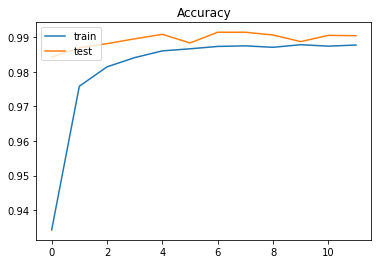

In [8]:
# 学習の様子をグラフへ描画 --- (*6)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

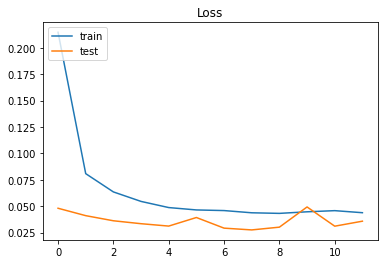

In [9]:
# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

読み込んだ元画像


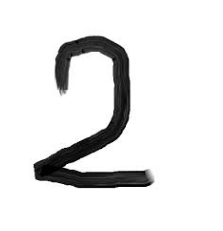

この画像の数字は2です 



In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_number(filename):
  # 読み込み
  img = cv2.imread(filename)
  # 読み込んだ画像を表示する
  print("読み込んだ元画像")
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  # 読み込み画像をリサイズ
  img = cv2.resize(img,(28,28))
 
  # ネガポジ反転
  img = 255 - img
  
  # CNNモデルに対応するようにデータを(1, 28, 28)の三次元配列に変換
  img = img.reshape(1, 28, 28, 1).astype('float32') / 255
  # 予測
  ret = model.predict(img)
  return ret


# 画像ファイルを指定
ans = predict_number("数字の2a.jpg")
print("この画像の数字は" +  str(np.argmax(ans)) + "です \n")